<a href="https://colab.research.google.com/github/veydantkatyal/pfizer-sentiment-analysis/blob/main/pfizer_vaccine_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMPORTING LIBRARIES & DATA LOADING**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob

data = pd.read_csv("vaccination_tweets.csv")

data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


# **CHECK FOR NULL VALUES AND DROP THEM**
Since we have a lot of features instead of imputing with mean and median, we drop features with null values

**CHECK NULL VALUES**

In [12]:
print(data.isnull().sum())

id                     0
user_name              0
user_location       1630
user_description     507
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64


**DROP ROWS**

In [13]:
data = data.dropna()

**VERIFY NULL ROWS & DROP**

In [14]:
print(data.isnull().sum())

id                  0
user_name           0
user_location       0
user_description    0
user_created        0
user_followers      0
user_friends        0
user_favourites     0
user_verified       0
date                0
text                0
hashtags            0
source              0
retweets            0
favorites           0
is_retweet          0
dtype: int64


**DESCRIPTIVE ANALYSIS**

In [15]:
print(data.describe())

                 id  user_followers   user_friends  user_favourites  \
count  4.749000e+03    4.749000e+03    4749.000000      4749.000000   
mean   1.355333e+18    5.069683e+04    1341.396926     14523.124447   
std    1.280104e+16    3.545440e+05    3453.847283     36379.651961   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.344929e+18    1.740000e+02     215.000000       497.000000   
50%    1.352030e+18    6.480000e+02     549.000000      2713.000000   
75%    1.364940e+18    2.728000e+03    1419.000000     12258.000000   
max    1.384788e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  4749.000000  4749.000000  
mean      1.545378     9.385555  
std      13.395572    55.280915  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     5.000000  
max     678.000000  1979.000000  


In [25]:
data.to_csv("cleaned_data.csv", index=False)
df_cleaned = pd.read_csv("cleaned_data.csv")
df_cleaned.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Subjectivity,Polarity,Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.125000,0.00,Neutral
1,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.033333,0.00,Neutral
2,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,0.500000,-0.10,Negative
3,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,covidvaccine states will start getting covidva...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,0.000000,0.00,Neutral
4,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.333333,0.25,Positive


# **CLEAN TEXT COLUMN**

The text column is the most important feature in this dataset as it contains the opinions of the users of Twitter about the Pfizer vaccine. But the text column needs to be prepared as it contains many special symbols and language errors

In [16]:
import re

# Function to clean the text
def clean_text(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text)  # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove '#' symbol
    text = re.sub(r'RT[\s]+', '', text)  # Remove RT
    text = re.sub(r'https?:\/\/\S+', '', text)  # Remove hyperlinks
    text = re.sub(r'\n', '', text)  # Remove newlines
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = text.lower()  # Convert to lowercase
    return text

# Apply the clean_text function to the 'text' column
data['text'] = data['text'].apply(clean_text)

data['text'].head()

,text
0,same folks said daikon paste could treat a cyt...
2,coronavirus sputnikv astrazeneca pfizerbiontec...
6,it is a bit sad to claim the fame for success ...
9,covidvaccine states will start getting covidva...
10,while deaths are closing in on the mark milli...


# **DISPLAY WORD COUNTS**
 Word Cloud is a data visualisation technique that shows the most used words in large font and the less used words in small font.

**TEXT**

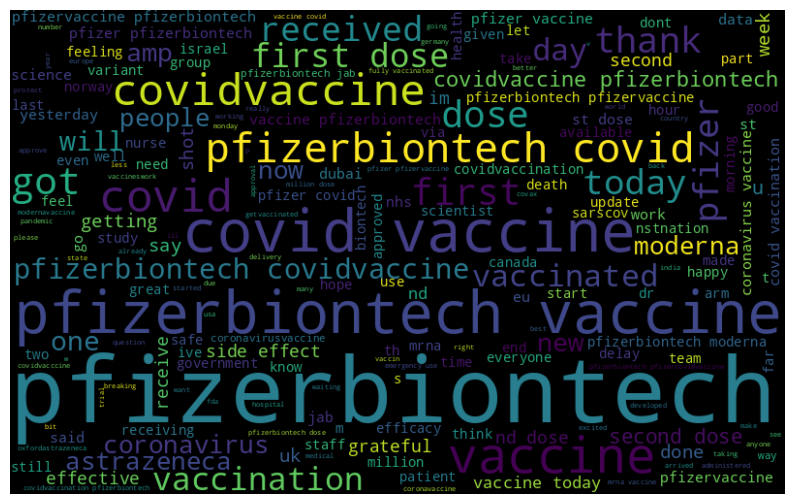

In [29]:
# Combine all text into one string
all_words = ' '.join([text for text in data['text']])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.savefig("text.png")
plt.axis('off')
plt.show()

**HASHTAG**

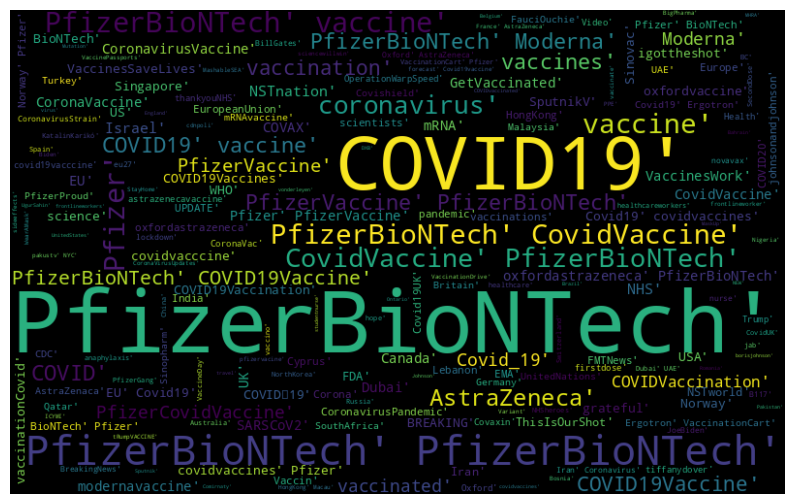

In [28]:
# Combine all hashtags into one string
all_hashtags = ' '.join([str(tag) for tag in data['hashtags']])

# Generate the word cloud
hashtag_wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_hashtags)

# Plot the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(hashtag_wordcloud, interpolation='bilinear')
plt.savefig("hashtag.png")
plt.axis('off')
plt.show()

The “user_verified” column in the dataset shows whether the users who have shared their opinions are verified by Twitter or not. A verified user on Twitter is a public figure or a celebrity.

In [19]:
verified_counts = data['user_verified'].value_counts()
print(verified_counts)

user_verified
False    4169
True      580
Name: count, dtype: int64


# **SENTIMENT ANALYSIS ON TEXT**

In [20]:
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Function to classify the sentiment
def get_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

# Create new columns for subjectivity and polarity
data['Subjectivity'] = data['text'].apply(get_subjectivity)
data['Polarity'] = data['text'].apply(get_polarity)

data['Sentiment'] = data['Polarity'].apply(get_sentiment)

data[['text', 'Subjectivity', 'Polarity', 'Sentiment']].head()


,text,Subjectivity,Polarity,Sentiment
0,same folks said daikon paste could treat a cyt...,0.125000,0.00,Neutral
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.033333,0.00,Neutral
6,it is a bit sad to claim the fame for success ...,0.500000,-0.10,Negative
9,covidvaccine states will start getting covidva...,0.000000,0.00,Neutral
10,while deaths are closing in on the mark milli...,0.333333,0.25,Positive


In [27]:
data.to_csv("sentiment_data.csv", index=False)
df_sentiment = pd.read_csv("sentiment_data.csv")
df_sentiment.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,Subjectivity,Polarity,Sentiment
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,0.125000,0.00,Neutral
1,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,coronavirus sputnikv astrazeneca pfizerbiontec...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,0.033333,0.00,Neutral
2,1337851215875608579,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,2013-06-10 17:49:22,2731,5001,69344,False,2020-12-12 20:06:00,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,0.500000,-0.10,Negative
3,1337842295857623042,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,2012-11-12 04:18:12,671,2368,20469,False,2020-12-12 19:30:33,covidvaccine states will start getting covidva...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,0.000000,0.00,Neutral
4,1337841934170255365,Tamer Yazar,Turkey-Israel,"Im Market Analyst, also Editor... working (fre...",2009-09-17 16:45:16,1302,78,339,False,2020-12-12 19:29:07,while deaths are closing in on the mark milli...,"['PfizerBioNTech', 'Vaccine']",Twitter Web App,0,0,False,0.333333,0.25,Positive


**SENTIMENT DISTRIBUTION**

<ipython-input-30-7df379da3f34>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=data, palette='viridis')


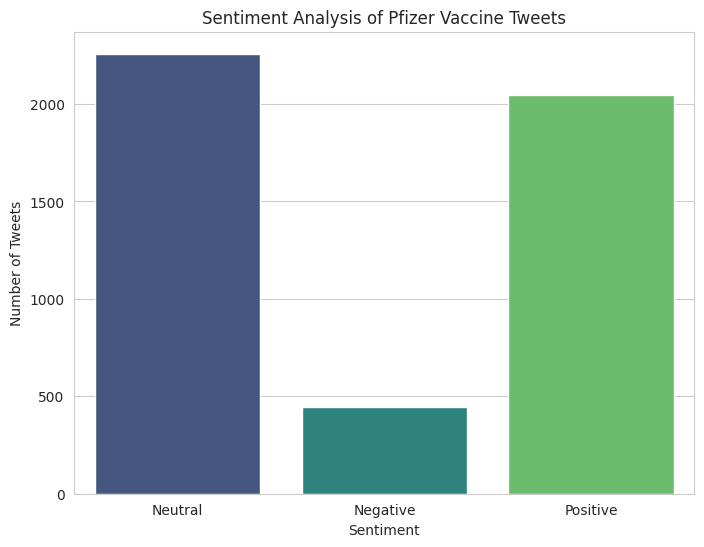

In [30]:
import seaborn as sns

sns.set_style('whitegrid')

plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=data, palette='viridis')
plt.title('Sentiment Analysis of Pfizer Vaccine Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.savefig("sentiment-distribution.png")
plt.show()

# **TOTAL SENTIMENT SCORE**

In [22]:
sentiment_totals = data['Sentiment'].value_counts()

print(sentiment_totals)

Sentiment
Neutral     2258
Positive    2044
Negative     447
Name: count, dtype: int64
